<a href="https://colab.research.google.com/github/reneordosgoitia/Algorithmic-trading/blob/main/binance_api_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we are going to install the binance Rest API in order to access and use data. 

In [1]:
pip install python-binance


Note: you may need to restart the kernel to use updated packages.


Import the libraries you are going to use.

In [2]:
import pandas as pd
import numpy as np
from binance.client import Client
import datetime as dt
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import matplotlib
matplotlib.style.use('seaborn')
# client configuration
api_key = 'xxx' 
api_secret = 'xxx'
client = Client(api_key, api_secret)

At this step, we are going to obtain only the cryptocurrencies at USDT terms.

In [3]:
tickers = pd.DataFrame(client.get_all_tickers()) #client.get_all_tickers() this is going to help us to obtain all the tickers.
list_symbols = tickers["symbol"]

In [4]:
filt = []
word = str("USDT")
for i in list_symbols:

  if word in i: # here we select only XXXUSDT pairs.

    filt.append(i)

filt1 = filt[:50] #filter for 50 pairs


In this section, we are going to construct the database of all the selected currencies with their OHLC, volumen, open time, close time.

In [6]:
interval="15m" #here we select the timeframe we are going to use in order to do the analysis.
Client.KLINE_INTERVAL_15MINUTE 
data = [pd.DataFrame(client.get_historical_klines(i, interval, "15 Jan,2023")) for i in filt1 ]

for i in range(len(data)-1,0,-1):
  
    if data[i].empty: #here we clean the data, deleting those with empty data.
      del data[i]
    
    data[i]["symbol"] = filt1[i]
  
    

In [7]:
data[0].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore"]
data[0]["symbol"] = filt1[0]

In [8]:
for i in range(len(data)):
  data[i].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore","symbol"]
  data[i].index = [dt.datetime.fromtimestamp(i/1000.0) for i in data[i].close_time]


In [9]:
full_data = []

full_data = pd.concat(data)

In [10]:
full_data = pd.DataFrame(full_data.set_index(['symbol',full_data.index])["close"])

In [11]:
symbols = list(set(full_data.index.get_level_values(0)))


In [12]:
cl = full_data.loc["BTCUSDT"][["close"]]

In [13]:
cl.rename({"close": "BTCUSDT"}, axis = 1, inplace= True)

In [14]:
for i in symbols:
  if i !="BTCUSDT":
    cl[i]= full_data.loc[i][["close"]]

In [15]:
cl = cl.astype(float)

In [16]:
corr = cl.corr()

In [17]:
corr

,BTCUSDT,ETHUSDT,PAXUSDT,BATUSDT,DASHUSDT,MITHUSDT,ADAUSDT,IOSTUSDT,BNBUSDT,BTTUSDT,...,VENUSDT,ENJUSDT,FTMUSDT,BCCUSDT,TFUELUSDT,QTUMUSDT,XMRUSDT,ZECUSDT,NANOUSDT,TRXUSDT
BTCUSDT,1.000000,0.759161,0.836531,0.824433,0.667985,0.709427,0.920279,0.706972,0.724527,0.808531,...,0.821531,0.850309,0.790593,0.815999,0.800486,0.874918,0.536591,0.554528,0.754608,0.652430
ETHUSDT,0.759161,1.000000,0.717333,0.782745,0.635251,0.670525,0.809147,0.713308,0.784814,0.741764,...,0.714766,0.756827,0.658999,0.812991,0.604192,0.738951,0.320810,0.655374,0.674355,0.755363
PAXUSDT,0.836531,0.717333,1.000000,0.744139,0.538173,0.737427,0.873580,0.720409,0.684676,0.757729,...,0.784525,0.675661,0.690361,0.781066,0.794558,0.807548,0.699036,0.616334,0.705858,0.777206
BATUSDT,0.824433,0.782745,0.744139,1.000000,0.752851,0.862844,0.892896,0.893782,0.884688,0.920468,...,0.917766,0.880661,0.870113,0.933883,0.856199,0.925111,0.228926,0.354662,0.928562,0.782298
DASHUSDT,0.667985,0.635251,0.538173,0.752851,1.000000,0.861175,0.799838,0.559238,0.877485,0.663983,...,0.776803,0.749558,0.884572,0.841505,0.777026,0.834636,0.162351,0.180378,0.724675,0.754746
MITHUSDT,0.709427,0.670525,0.737427,0.862844,0.861175,1.000000,0.871733,0.759522,0.904783,0.826043,...,0.914062,0.761297,0.926704,0.918550,0.918608,0.894717,0.239800,0.180790,0.841394,0.862256
ADAUSDT,0.920279,0.809147,0.873580,0.892896,0.799838,0.871733,1.000000,0.789204,0.878885,0.841360,...,0.908056,0.841118,0.903342,0.939412,0.884574,0.949417,0.482641,0.464884,0.853435,0.832956
IOSTUSDT,0.706972,0.713308,0.720409,0.893782,0.559238,0.759522,0.789204,1.000000,0.821354,0.880082,...,0.872139,0.670279,0.744008,0.872010,0.761933,0.836901,0.177458,0.289843,0.930159,0.761122
BNBUSDT,0.724527,0.784814,0.684676,0.884688,0.877485,0.904783,0.878885,0.821354,1.000000,0.799606,...,0.894774,0.752990,0.911244,0.952752,0.818240,0.897093,0.181119,0.254367,0.872588,0.871969
BTTUSDT,0.808531,0.741764,0.757729,0.920468,0.663983,0.826043,0.841360,0.880082,0.799606,1.000000,...,0.891041,0.832728,0.787731,0.881342,0.854562,0.899330,0.263146,0.335290,0.895148,0.738009


In [18]:
corr_mat = corr.corr(method = "pearson")

In [19]:
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat = sorted_mat[sorted_mat < 1]

In [20]:
sorted_mat

XMRUSDT   FETUSDT    -0.890037
FETUSDT   XMRUSDT    -0.890037
ZECUSDT   FETUSDT    -0.782598
FETUSDT   ZECUSDT    -0.782598
ZECUSDT   ONEUSDT    -0.734092
                        ...   
ONEUSDT   BNBUSDT     0.983539
DASHUSDT  LTCUSDT     0.985298
LTCUSDT   DASHUSDT    0.985298
NANOUSDT  ONTUSDT     0.990184
ONTUSDT   NANOUSDT    0.990184
Length: 1482, dtype: float64

In [21]:
sorted_mat.tail(30) #here we can find the must correlated

BATUSDT    ONTUSDT      0.967024
ONTUSDT    BATUSDT      0.967024
LTCUSDT    ATOMUSDT     0.967247
ATOMUSDT   LTCUSDT      0.967247
CELRUSDT   TFUELUSDT    0.967605
TFUELUSDT  CELRUSDT     0.967605
BTTUSDT    BATUSDT      0.969761
BATUSDT    BTTUSDT      0.969761
BCCUSDT    VENUSDT      0.970729
VENUSDT    BCCUSDT      0.970729
VETUSDT    HOTUSDT      0.971688
HOTUSDT    VETUSDT      0.971688
ONEUSDT    MITHUSDT     0.972115
MITHUSDT   ONEUSDT      0.972115
ONEUSDT    FTMUSDT      0.972666
FTMUSDT    ONEUSDT      0.972666
BCCUSDT    BNBUSDT      0.974740
BNBUSDT    BCCUSDT      0.974740
CELRUSDT   FTMUSDT      0.978114
FTMUSDT    CELRUSDT     0.978114
BNBUSDT    ATOMUSDT     0.978192
ATOMUSDT   BNBUSDT      0.978192
QTUMUSDT   VENUSDT      0.982958
VENUSDT    QTUMUSDT     0.982958
BNBUSDT    ONEUSDT      0.983539
ONEUSDT    BNBUSDT      0.983539
DASHUSDT   LTCUSDT      0.985298
LTCUSDT    DASHUSDT     0.985298
NANOUSDT   ONTUSDT      0.990184
ONTUSDT    NANOUSDT     0.990184
dtype: flo

In [22]:
symbol1 = cl["CELRUSDT"]
symbol2 = cl["ONEUSDT"]

<AxesSubplot:>

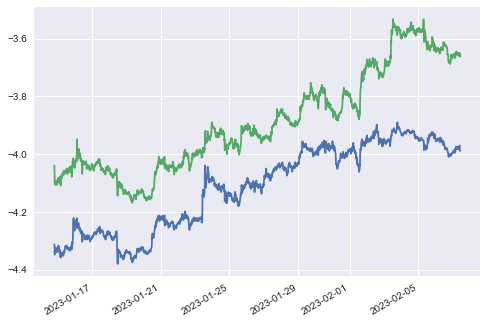

In [23]:
np.log(symbol1).plot()
np.log(symbol2).plot() #example of correlation of two symbols.


In [24]:
# make the necessary imports

import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [25]:
data = cl

In [26]:
def find_cointegrated_pairs(data): #here we construct the cointegration function for many pairs.
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('ETHUSDT', 'ETCUSDT'), ('PAXUSDT', 'ADAUSDT'), ('PAXUSDT', 'EOSUSDT'), ('PAXUSDT', 'HOTUSDT'), ('PAXUSDT', 'TFUELUSDT'), ('BATUSDT', 'BNBUSDT'), ('BATUSDT', 'BTTUSDT'), ('BATUSDT', 'ONEUSDT'), ('BATUSDT', 'ONTUSDT'), ('BATUSDT', 'HOTUSDT'), ('BATUSDT', 'ZRXUSDT'), ('BATUSDT', 'ICXUSDT'), ('BATUSDT', 'VENUSDT'), ('BATUSDT', 'FTMUSDT'), ('BATUSDT', 'BCCUSDT'), ('BATUSDT', 'QTUMUSDT'), ('BATUSDT', 'NANOUSDT'), ('MITHUSDT', 'WAVESUSDT'), ('MITHUSDT', 'TFUELUSDT'), ('MITHUSDT', 'TRXUSDT'), ('ADAUSDT', 'HOTUSDT'), ('ADAUSDT', 'TFUELUSDT'), ('IOSTUSDT', 'ZILUSDT'), ('IOSTUSDT', 'ZRXUSDT'), ('IOSTUSDT', 'ICXUSDT'), ('IOSTUSDT', 'NANOUSDT'), ('BNBUSDT', 'ONEUSDT'), ('BNBUSDT', 'ATOMUSDT'), ('BNBUSDT', 'LTCUSDT'), ('BNBUSDT', 'FTMUSDT'), ('BNBUSDT', 'BCCUSDT'), ('BNBUSDT', 'TRXUSDT'), ('BTTUSDT', 'TUSDUSDT'), ('BTTUSDT', 'ZILUSDT'), ('BTTUSDT', 'ONTUSDT'), ('BTTUSDT', 'HOTUSDT'), ('BTTUSDT', 'THETAUSDT'), ('BTTUSDT', 'ZRXUSDT'), ('BTTUSDT', 'WAVESUSDT'), ('BTTUSDT', 'VENUSDT'), ('BTTUSDT', 'BC

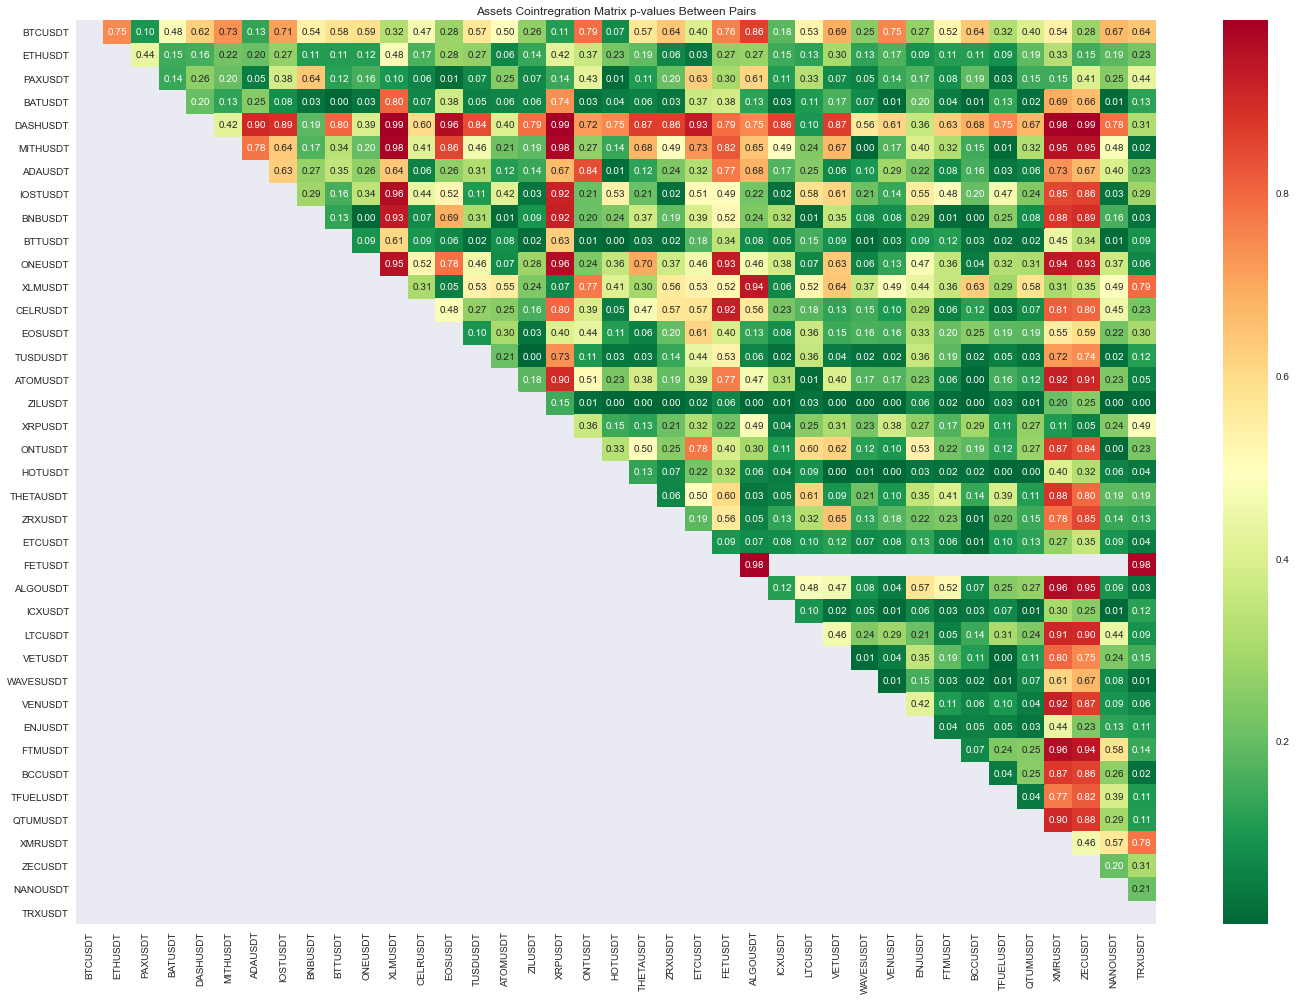

In [27]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(data)  
print(pairs)
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(pvalues, xticklabels = data.columns,
                yticklabels = data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
#plt.savefig('images/chart2', dpi=300)  plotting the cointegration matrix.